In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
m01=pd.read_csv("meter_01_all.csv",parse_dates=['date_time'],delimiter=',')
m01.head()

,date_time,temperature (C)
0,2012-09-24 13:30:00,11.5882
1,2012-09-24 14:00:00,11.5882
2,2012-09-24 14:30:00,12.2216
3,2012-09-24 15:00:00,12.6090
4,2012-09-24 15:30:00,12.6471


In [3]:
m04=pd.read_csv("meter_04_all.csv",parse_dates=['date_time'],delimiter=',')
m07=pd.read_csv("meter_07_all.csv",parse_dates=['date_time'],delimiter=',')
m10=pd.read_csv("meter_10_all.csv",parse_dates=['date_time'],delimiter=',')
m13=pd.read_csv("meter_13_all.csv",parse_dates=['date_time'],delimiter=',')
m16=pd.read_csv("meter_16_all.csv",parse_dates=['date_time'],delimiter=',')
m04.head()


,date_time,consumption (kWh)
0,2012-09-24 13:30:00,69.0591
1,2012-09-24 14:00:00,68.7600
2,2012-09-24 14:30:00,67.6455
3,2012-09-24 15:00:00,67.2157
4,2012-09-24 15:30:00,63.7158


In [4]:
m01p = m01.set_index('date_time')
m04p = m04.set_index('date_time')
m07p = m07.set_index('date_time')
m10p = m10.set_index('date_time')
m13p = m13.set_index('date_time')
m16p = m16.set_index('date_time')
m04p.head()
#m04p.plot(figsize=(12,2))

,consumption (kWh)
date_time,
2012-09-24 13:30:00,69.0591
2012-09-24 14:00:00,68.7600
2012-09-24 14:30:00,67.6455
2012-09-24 15:00:00,67.2157
2012-09-24 15:30:00,63.7158


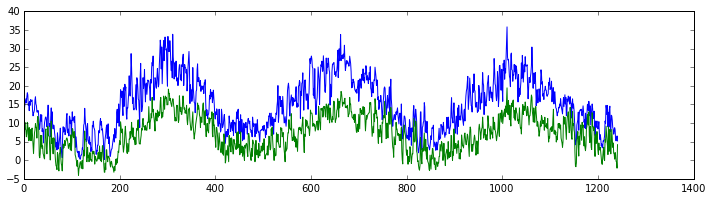

In [5]:
fig,ax = plt.subplots(figsize=(12,3))
ax.plot(m01p.resample('D',how=max))
ax.plot(m01p.resample('D',how=min))
plt.show()


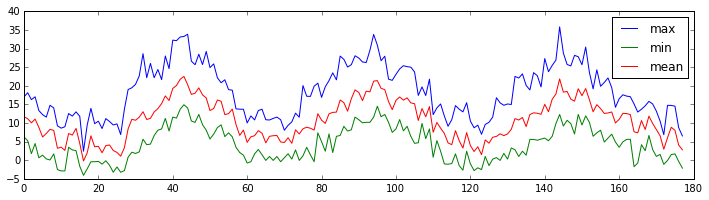

In [19]:
fig,ax = plt.subplots(figsize=(12,3))
ax.plot(m01p.resample('W',how=max),label='max')
ax.plot(m01p.resample('W',how=min),label='min')
ax.plot(m01p.resample('W'),label='mean')
plt.legend()
plt.show()


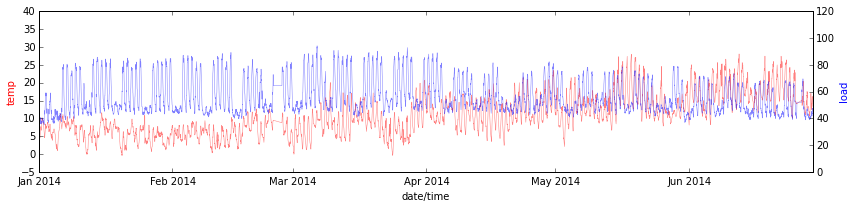

In [7]:
fig,ax1 = plt.subplots(figsize=(12,3))

ax2 = ax1.twinx()
ax1.plot(m01['date_time'],m01['temperature (C)'],c='red',lw=0.5,alpha=0.5)
ax2.plot(m04['date_time'],m04['consumption (kWh)'],c='blue',lw=0.5,alpha=0.5)
ax1.set_ylabel('temp', color='red')
ax2.set_ylabel('load', color='blue')
ax1.set_xlabel('date/time')

plt.xlim("2014-01-01","2014-06-30")
plt.tight_layout()
plt.show()

In [8]:
m01dmax = m01p.resample('D',how='max')
m01dsum = m01p.resample('D',how='sum')
m01dmin = m01p.resample('D',how='min')
m04dsum = m04p.resample('D',how='sum')
m04dsum_wmin = m04dsum.resample('W',how='min')
m04dsum_wmax = m04dsum.resample('W',how='max')
m01dmax.head()

,temperature (C)
date_time,
2012-09-24,12.6471
2012-09-25,13.9441
2012-09-26,15.0810
2012-09-27,15.8235
2012-09-28,16.4995


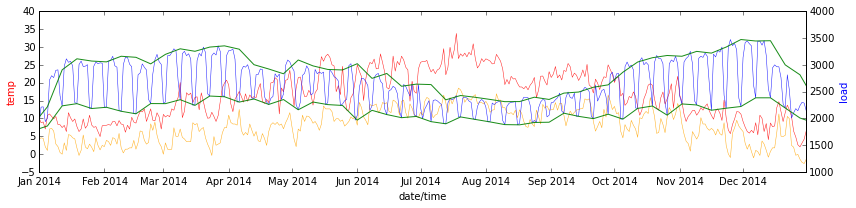

In [9]:
fig,ax1 = plt.subplots(figsize=(12,3))
ax2 = ax1.twinx()
ax1.plot(m01dmin.index, m01dmin,c='orange',lw=0.5,alpha=0.9)
ax1.plot(m01dmax.index, m01dmax,c='red',   lw=0.5,alpha=0.9)
ax2.plot(m04dsum.index, m04dsum,c='blue',  lw=0.5,alpha=0.9)
ax2.plot(m04dsum_wmin.index, m04dsum_wmin,c='green',lw=1.0,alpha=0.9)
ax2.plot(m04dsum_wmax.index, m04dsum_wmax,c='green',lw=1.0,alpha=0.9)
ax1.set_ylabel('temp', color='red')
ax2.set_ylabel('load', color='blue')
ax1.set_xlabel('date/time')

plt.xlim("2014-01-01","2014-12-31")
plt.tight_layout()
plt.show()

,temperature (C)
"(1, 0)",4.732721
"(1, 1)",4.614517
"(1, 2)",4.484339
"(1, 3)",4.383540
"(1, 4)",4.308145


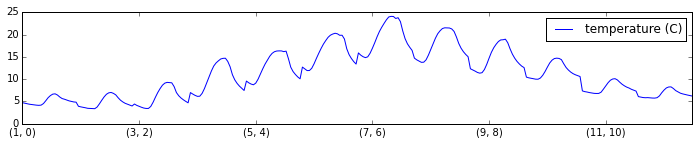

In [10]:
m01hourly = m01p.groupby(lambda x:(x.month, x.hour)).mean()
m01hourly.plot(figsize=(12,2))
m01hourly.head()


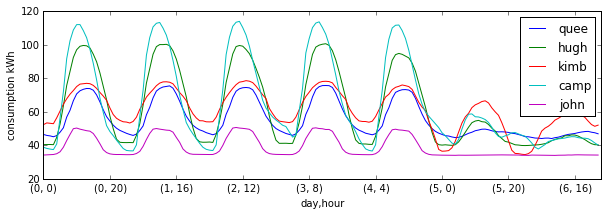

In [11]:
#m04 'Queens'
#m07 'Hugh Aston'
#m10 'Kimberlin',
#m13 'Campus Centre',
#m16 'John Whitehead',

m04['weekday'] = pd.DatetimeIndex(m04['date_time']).weekday
m07['weekday'] = pd.DatetimeIndex(m07['date_time']).weekday
m10['weekday'] = pd.DatetimeIndex(m10['date_time']).weekday
m13['weekday'] = pd.DatetimeIndex(m13['date_time']).weekday
m16['weekday'] = pd.DatetimeIndex(m16['date_time']).weekday

m04p = m04.set_index('date_time')
m07p = m07.set_index('date_time')
m10p = m10.set_index('date_time')
m13p = m13.set_index('date_time')
m16p = m16.set_index('date_time')
#m04p.head()

m04hour = m04p.groupby(lambda x:(x.weekday(),x.hour)).mean()
m07hour = m07p.groupby(lambda x:(x.weekday(),x.hour)).mean()
m10hour = m10p.groupby(lambda x:(x.weekday(),x.hour)).mean()
m13hour = m13p.groupby(lambda x:(x.weekday(),x.hour)).mean()
m16hour = m16p.groupby(lambda x:(x.weekday(),x.hour)).mean()

plt.figure(figsize=(10,3))
m04hour['consumption (kWh)'].plot(label='quee')
m07hour['consumption (kWh)'].plot(label='hugh')
m10hour['consumption (kWh)'].plot(label='kimb')
m13hour['consumption (kWh)'].plot(label='camp')
m16hour['consumption (kWh)'].plot(label='john')
plt.legend(loc=1)
plt.xlim(0,168)
plt.ylim(20,120)
plt.xlabel('day,hour')
plt.ylabel('consumption kWh')

In [12]:

m04hour.head()

,consumption (kWh),weekday
"(0, 0)",46.513703,0
"(0, 1)",45.921753,0
"(0, 2)",45.629653,0
"(0, 3)",45.127695,0
"(0, 4)",45.804245,0


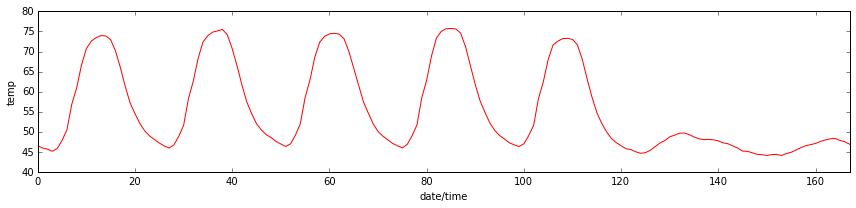

In [13]:
m04hour.index = pd.MultiIndex.from_tuples(m04hour.index)
fig,ax = plt.subplots(figsize=(12,3))
ax.plot(m04hour.index.get_level_values(0)*24+m04hour.index.get_level_values(1), m04hour['consumption (kWh)'],c='red')
ax.set_ylabel('temp')
ax.set_xlabel('date/time')
plt.xlim(0,167)
plt.tight_layout()
plt.show()

In [14]:
#m04hour.index.head()

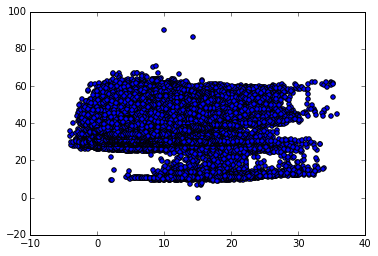

In [15]:
num =59000
#num = 59568
x=m01['temperature (C)'].head(num)
y=m16['consumption (kWh)'].head(num)
plt.scatter(x,y,marker='o')
plt.show()

#x.tail()

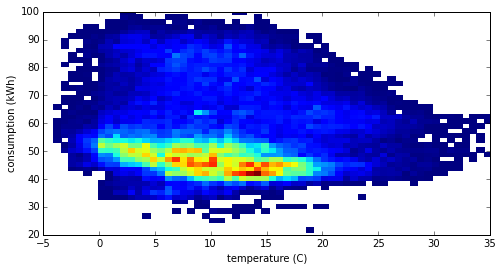

In [16]:
num =59000
#num = 59568
x=m01['temperature (C)'].head(num)
y=m04['consumption (kWh)'].head(num)
counts, ybins, xbins = np.histogram2d(y, x, bins=60)
counts = np.ma.masked_equal(counts, 0) # mask zero counts
fig, ax = plt.subplots(figsize=(8,4))
ax.pcolormesh(xbins, ybins, counts)
plt.xlim(-5,35)
plt.ylim(20,100)
plt.xlabel('temperature (C)')
plt.ylabel('consumption (kWh)')
plt.show()

In [17]:
m04['hour'] = pd.DatetimeIndex(m04['date_time']).hour
m04p = m04.set_index('date_time')
m04.head()

,date_time,consumption (kWh),weekday,hour
0,2012-09-24 13:30:00,69.0591,0,13
1,2012-09-24 14:00:00,68.7600,0,14
2,2012-09-24 14:30:00,67.6455,0,14
3,2012-09-24 15:00:00,67.2157,0,15
4,2012-09-24 15:30:00,63.7158,0,15


In [18]:
# m04wd = m04p[m04p.index.dayofweek <5]
x=m04wd['hour']
y=m04wd['consumption (kWh)']
counts, ybins, xbins = np.histogram2d(y, x, bins=24)
counts = np.ma.masked_equal(counts,0) # mask zero counts
fig, ax = plt.subplots(figsize=(8,4))
ax.pcolormesh(xbins, ybins, counts)
plt.xlabel('hour')
plt.ylabel('consumption (kWh)')
plt.show()

NameError: name 'm04wd' is not defined